In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('regression.db')
df = pd.read_sql_query('SELECT * FROM Insurance_Prediction', conn)
df


,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.88,2.0,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.89,0.0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59.0,male,46.67,2.0,no,northeast,High blood pressure,None,Frequently,Student,Basic,11584.134900
999996,33.0,male,36.83,2.0,no,northeast,None,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39.0,male,39.84,0.0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37.0,female,45.06,4.0,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


In [3]:
df.isnull().sum()

age                        40000
gender                     24000
bmi                            0
children                   32000
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                 32000
coverage_level                 0
charges                        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     960000 non-null   float64
 1   gender                  976000 non-null   object 
 2   bmi                     1000000 non-null  float64
 3   children                968000 non-null   float64
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              968000 non-null   object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(4), object(8)
memory usage: 91.6+ MB


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.88,2.0,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.89,0.0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59.0,male,46.67,2.0,no,northeast,High blood pressure,None,Frequently,Student,Basic,11584.134900
999996,33.0,male,36.83,2.0,no,northeast,None,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39.0,male,39.84,0.0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37.0,female,45.06,4.0,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


In [7]:
df_copy = df.copy()

In [8]:
df_copy = df_copy.iloc[:100000]

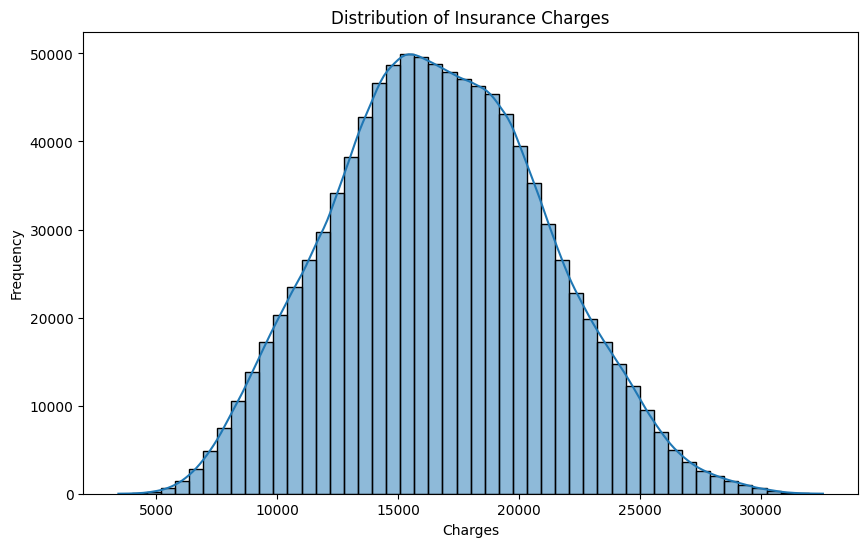

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

The target variable (charges) shows an approximately bell-shaped distribution with slight right skewness.
 The presence of high-charge outliers reflects real-world high-risk individuals and was retained for modeling. 
 The distribution confirms suitability for regression models while indicating potential non-linear relationships

Age vs charges

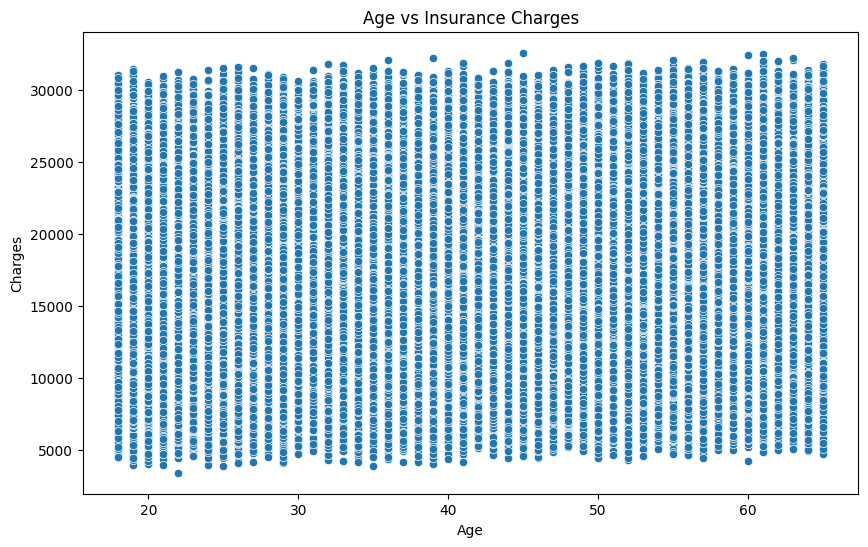

In [10]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'age', y = 'charges' , data = df)
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


The scatter plot of age versus insurance charges shows that while charges generally increase with age, the relationship is non-linear with increasing variance for older individuals. This suggests that age interacts with other risk factors and motivates the use of non-linear regression models.

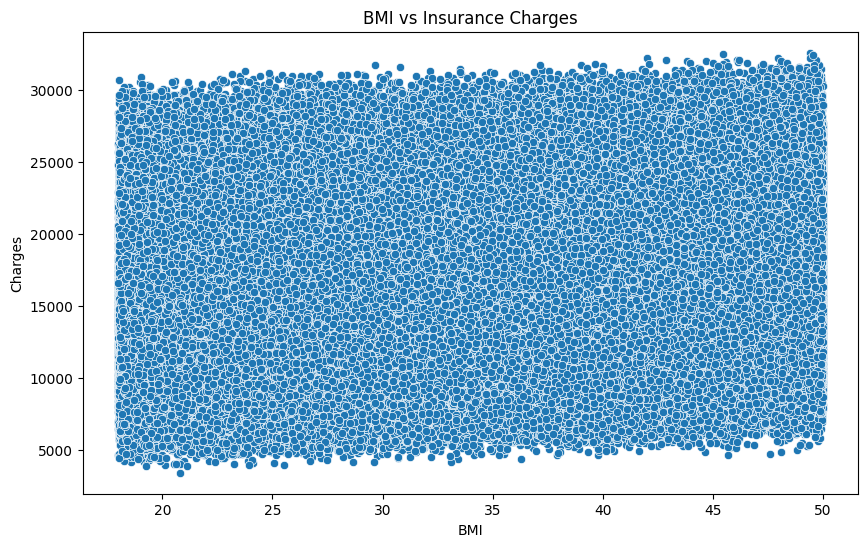

In [11]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'bmi', y = 'charges', data = df)
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

The BMI versus insurance charges scatter plot shows a weak and non-linear relationship. While higher BMI values exhibit a slightly increased upper bound of charges, BMI alone does not strongly explain insurance costs. This indicates that BMI primarily influences charges through interactions with other risk factors such as smoking status and age.

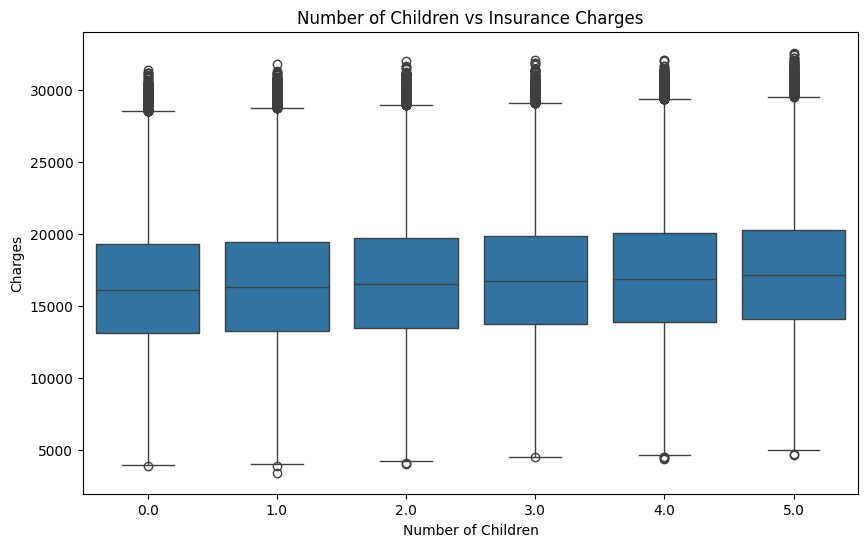

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'children', y = 'charges', data = df)
plt.title('Number of Children vs Insurance Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

The box plot of number of children versus insurance charges shows a slight increase in median charges as family size increases; however, the distributions largely overlap across categories. This indicates that the number of children has a relatively weak influence on insurance charges compared to other factors.

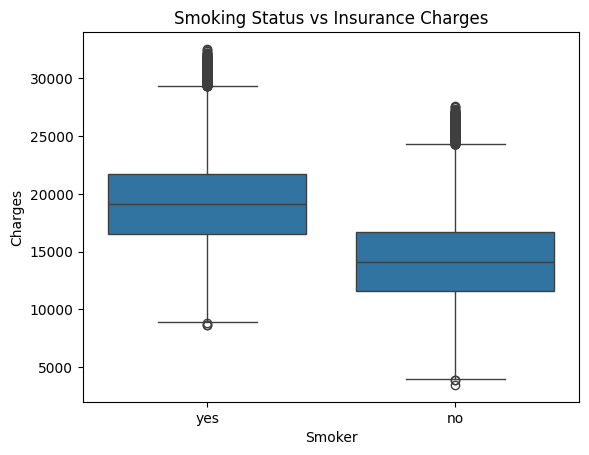

In [13]:
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoking Status vs Insurance Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

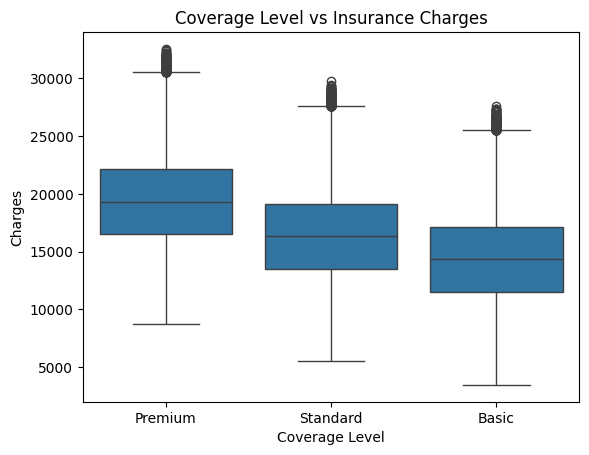

In [14]:
sns.boxplot(x = 'coverage_level', y ='charges', data = df)
plt.title('Coverage Level vs Insurance Charges')
plt.xlabel('Coverage Level')
plt.ylabel('Charges')
plt.show()

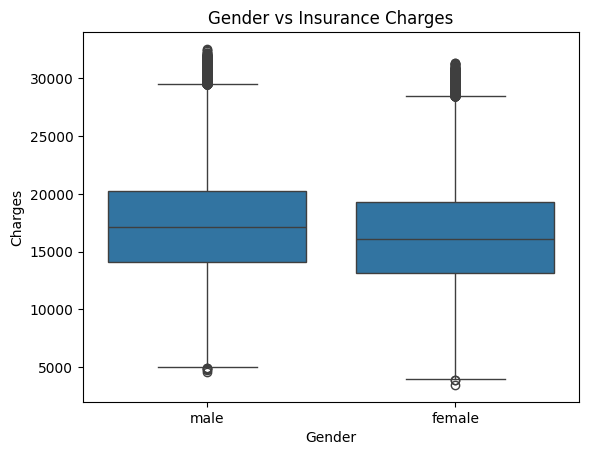

In [15]:
sns.boxplot(x='gender', y='charges', data=df)
plt.title('Gender vs Insurance Charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

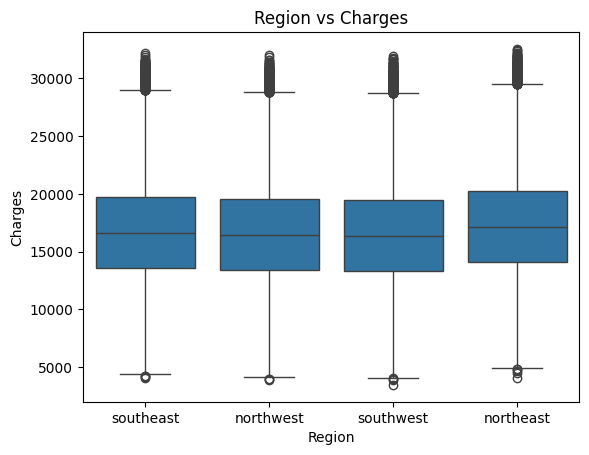

In [16]:
sns.boxplot(x = 'region', y ='charges', data = df)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

The box plot comparing insurance charges across regions shows moderate regional variation, with the Northeast exhibiting slightly higher median charges. However, substantial overlap across regions indicates that geographic location alone is not a strong determinant of insurance costs

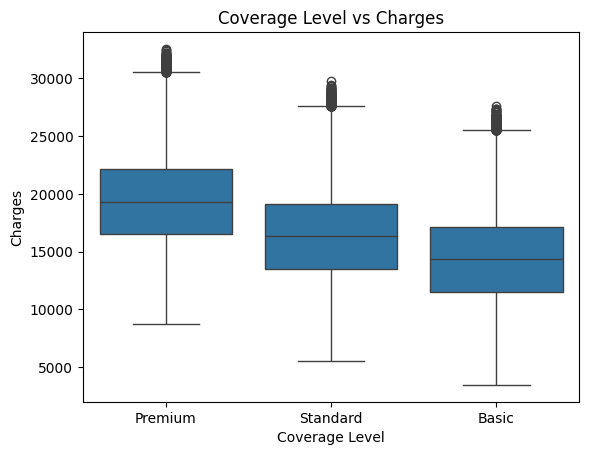

In [17]:
sns.boxplot(x='coverage_level', y='charges', data=df)
plt.title('Coverage Level vs Charges')
plt.xlabel('Coverage Level')
plt.ylabel('Charges')
plt.show()

The box plot of coverage level versus insurance charges shows a clear and ordered increase in charges from Basic to Premium plans. The distinct separation between coverage levels indicates that coverage level is a strong predictor of insurance charges and aligns well with real-world insurance pricing logic

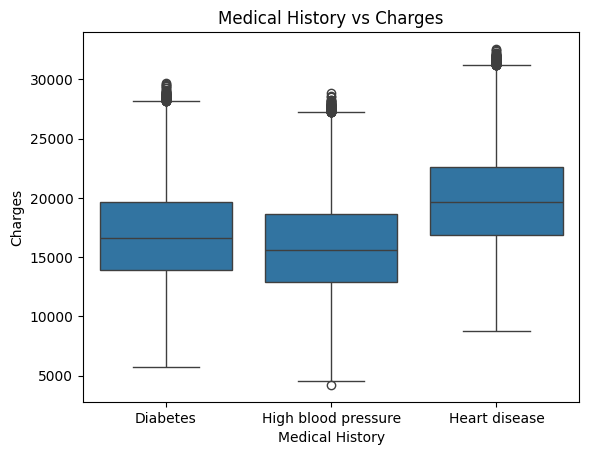

In [18]:
sns.boxplot(x = 'medical_history', y ='charges', data = df)
plt.title('Medical History vs Charges')
plt.xlabel('Medical History')
plt.ylabel('Charges')
plt.show()

The box plot of medical history versus insurance charges shows substantial variation across medical conditions. Individuals with heart disease incur significantly higher charges compared to those with diabetes or high blood pressure, indicating that medical history is a critical driver of insurance costs.

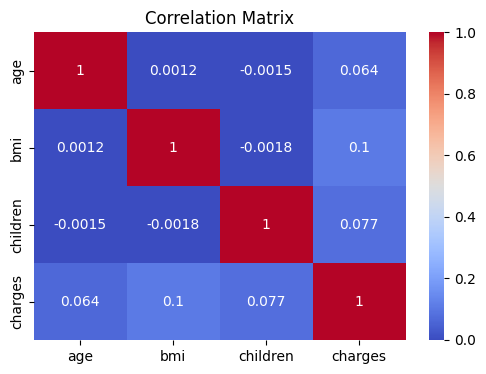

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["age", "bmi", "children", "charges"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation analysis shows weak linear relationships between numerical features and insurance charges. This indicates that insurance costs are driven by non-linear interactions and categorical risk factors rather than simple linear dependencies, motivating the use of non-linear regression models

Based on exploratory data analysis, the insurance premium prediction problem exhibits non-linear relationships and strong categorical effects. Linear regression was selected as a baseline model for comparison, while a Gradient Boosting Regressor was chosen as the final model due to its ability to capture complex interactions and non-linear patterns in tabular data.

In [20]:
df.describe()

,age,bmi,children,charges
count,960000.000000,1000000.000000,968000.000000,1000000.000000
mean,41.493661,34.001839,2.499985,16735.117481
std,13.855738,9.231680,1.707749,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,30.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [28]:
df.occupation.unique()

array(['Blue collar', 'White collar', 'Student', 'Unemployed', None],
      dtype=object)